/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


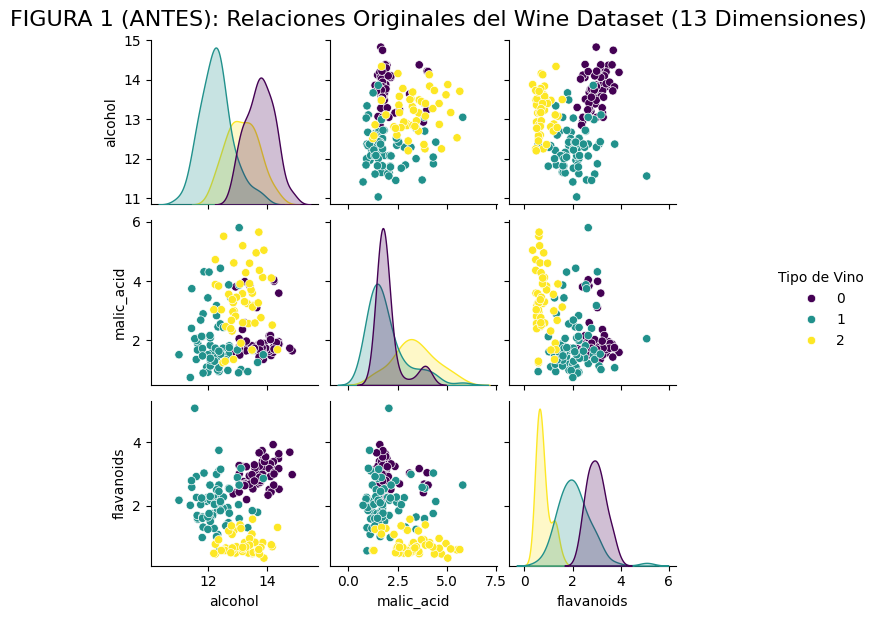

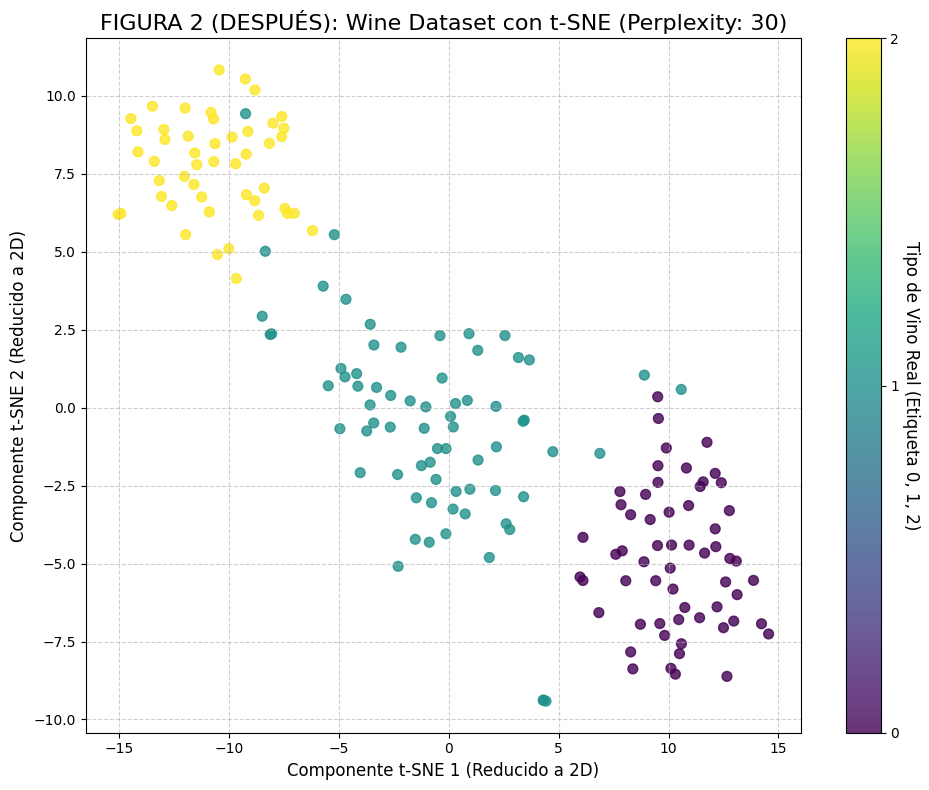

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------------------
# Carga y Preparación del Dataset Wine
# ----------------------------------------------------------------------

wine = load_wine()
X = wine.data    # Las características (13 dimensiones)
y = wine.target  # Las etiquetas reales (0, 1, 2)
feature_names = wine.feature_names

# Estandarización de Datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------------------------------------
#  Aplicación del Algoritmo t-SNE (Solo una vez)
# ----------------------------------------------------------------------

perplexity_val = 30
n_components_val = 2

tsne = TSNE(
    n_components=n_components_val,
    perplexity=perplexity_val,
    n_iter=1000,
    random_state=42,
    learning_rate='auto',
    init='pca'
)

X_tsne = tsne.fit_transform(X_scaled)

# ----------------------------------------------------------------------
# FIGURA 1 (ANTES): Visualización de Alta Dimensión
# ----------------------------------------------------------------------

# Creamos un DataFrame para la visualización ANTES
df_wine_sample = pd.DataFrame(X, columns=feature_names)
df_wine_sample['Tipo de Vino'] = y

# Seleccionamos las características para el pairplot
selected_features = ['alcohol', 'malic_acid', 'flavanoids']

sns.pairplot(df_wine_sample[selected_features + ['Tipo de Vino']],
             hue='Tipo de Vino',
             palette='viridis',
             diag_kind='kde',
             height=2)

plt.suptitle('FIGURA 1 (ANTES): Relaciones Originales del Wine Dataset (13 Dimensiones)',
             y=1.02, fontsize=16)
plt.show()


# ----------------------------------------------------------------------
# FIGURA 2 (DESPUÉS): Resultado de t-SNE (Reducido a 2D)
# ----------------------------------------------------------------------

plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,  # Color basado en la etiqueta real (el tipo de vino)
    cmap='viridis',
    s=50,
    alpha=0.8
)

# Configuración de la barra de color
cbar = plt.colorbar(scatter, ticks=np.unique(y))
cbar.set_label('Tipo de Vino Real (Etiqueta 0, 1, 2)', rotation=270, labelpad=15, fontsize=12)


plt.title(f'FIGURA 2 (DESPUÉS): Wine Dataset con t-SNE (Perplexity: {perplexity_val})', fontsize=16)
plt.xlabel('Componente t-SNE 1 (Reducido a 2D)', fontsize=12)
plt.ylabel('Componente t-SNE 2 (Reducido a 2D)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()